<a href="https://colab.research.google.com/github/tigranvartanyan/popytka1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled9_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [3]:
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
from sklearn.decomposition import PCA

Набор данных состоит из 9 различных категориальных и непрерывных праметров 1795 шоколадных плиток

In [8]:
B = pd.read_csv('flavors_of_cacao.csv')

In [9]:
B

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [10]:
B.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [11]:
B.shape

(1795, 9)

In [12]:
B.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

**target: Rating**

Numerical **columns**

In [13]:
num_cols = B.select_dtypes(exclude='object')
num_cols.shape

(1795, 3)

In [14]:
num_cols.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [15]:
B.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [16]:
B.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [17]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [18]:
B['Rating'].describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [19]:
B.size

16155

In [20]:
BRating = B['Rating']
BRating

0       3.75
1       2.75
2       3.00
3       3.50
4       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: Rating, Length: 1795, dtype: float64

In [21]:
BRating.max()

5.0

In [22]:
BRating.min()

1.0

In [23]:
BRating.mean()

3.185933147632312

In [24]:
BCoca = B['Cocoa\nPercent']
BCoca

0       63%
1       70%
2       70%
3       70%
4       70%
       ... 
1790    70%
1791    65%
1792    65%
1793    62%
1794    65%
Name: Cocoa\nPercent, Length: 1795, dtype: object

In [25]:
B['Cocoa\nPercent'].value_counts()

70%      672
75%      222
72%      189
65%       78
80%       72
74%       50
68%       47
60%       43
73%       40
85%       36
64%       34
77%       33
71%       31
67%       27
76%       23
66%       23
100%      20
82%       17
78%       17
55%       16
62%       14
63%       12
69%       10
90%        8
61%        8
88%        8
58%        8
81%        5
83%        4
84%        4
72.5%      4
91%        3
56%        2
73.5%      2
99%        2
89%        2
53%        1
46%        1
60.5%      1
57%        1
79%        1
86%        1
50%        1
42%        1
87%        1
Name: Cocoa\nPercent, dtype: int64

**Cacao data visualization**

<Axes: ylabel='Cocoa\nPercent'>

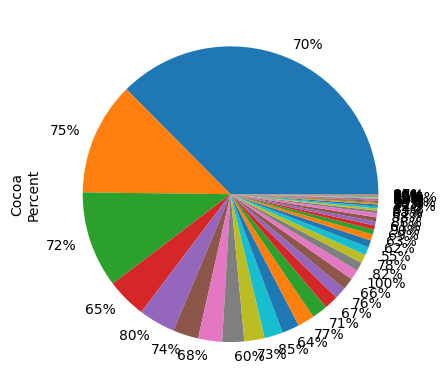

In [26]:
B['Cocoa\nPercent'].value_counts().plot(kind='pie')

Данные в столбце Cocoa\nPercent представляются исключительно важными, однако их нельзя непосредственно использовать как числовые, так как из-за наличия знака процента "%", непосредственно примыкающего к цифрам, они воспринимаются как строковые (object). Следующие манипуляции позволяют преобразовать их во float для дальнейшей работы

In [27]:
DD = np.arange(0,1795)

In [28]:
for i in range(1795):
  T = tuple(BCoca[i])
  DD[i] = float(T[0] + T[1])

In [29]:
DD

array([63, 70, 70, ..., 65, 62, 65])

In [30]:
type(DD[0])

numpy.int64

Теперь это числа, с которыми можно будет работать. Из очищенных данных составляем рабочую таблицу

In [31]:
BB = pd.DataFrame({
    "Origin": B['Specific Bean Origin\nor Bar Name'],
    "Percent": pd.Series(DD),
    "Location": B['Company\nLocation'],
    "Rating":B['Rating']
})

In [32]:
BB

,Origin,Percent,Location,Rating
0,Agua Grande,63,France,3.75
1,Kpime,70,France,2.75
2,Atsane,70,France,3.00
3,Akata,70,France,3.50
4,Quilla,70,France,3.50
...,...,...,...,...
1790,Peru,70,Austria,3.75
1791,Congo,65,Austria,3.00
1792,Kerala State,65,Austria,3.50
1793,Kerala State,62,Austria,3.25


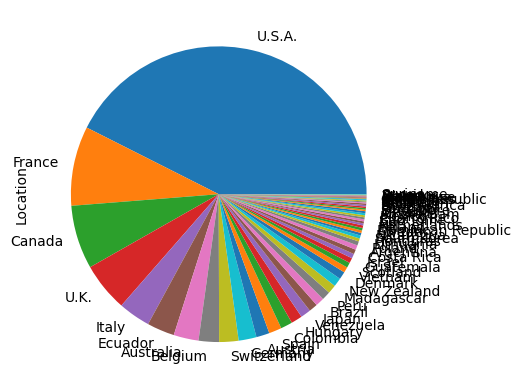

In [33]:
BB['Location'].value_counts().plot(kind='pie');

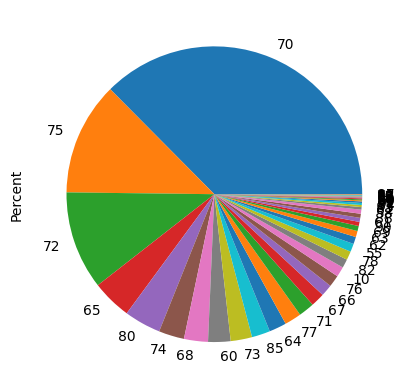

In [34]:
BB['Percent'].value_counts().plot(kind='pie');

<Axes: ylabel='Rating'>

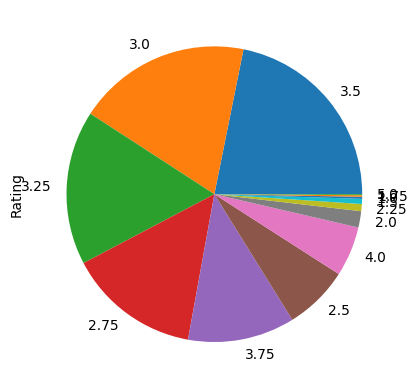

In [35]:
BB['Rating'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

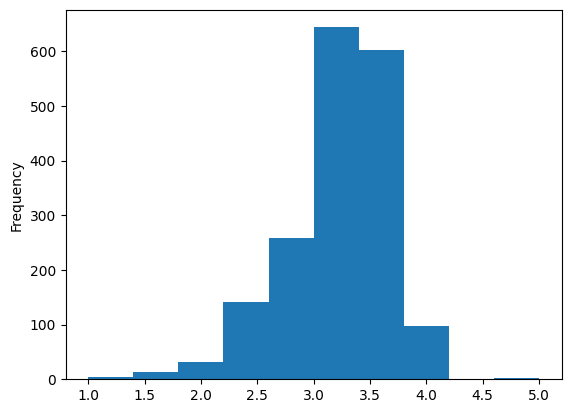

In [36]:
BB['Rating'].plot.hist()

In [37]:
B['Rating'].mean(0)

3.185933147632312

<Axes: ylabel='Frequency'>

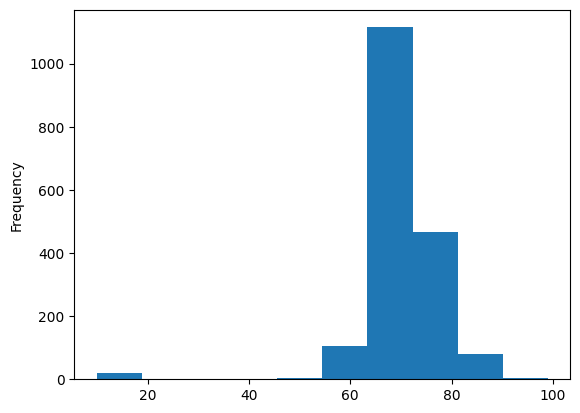

In [38]:
BB['Percent'].plot.hist()